# Enhanced ETL Pipeline with Visualizations
This notebook includes preprocessing, transformation, and multiple visualizations.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample Data
data = {
    'age': [25, 30, 45, 35, 22, 28],
    'salary': [50000, 60000, 80000, 75000, 48000, 54000],
    'city': ['Mumbai', 'Delhi', 'Bangalore', 'Pune', 'Mumbai', 'Delhi'],
    'purchased': [0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
df


,age,salary,city,purchased
0,25,50000,Mumbai,0
1,30,60000,Delhi,1
2,45,80000,Bangalore,1
3,35,75000,Pune,0
4,22,48000,Mumbai,0
5,28,54000,Delhi,1


## ETL Preprocessing Pipeline

In [2]:

numeric_features = ['age', 'salary']
categorical_features = ['city']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X = df.drop('purchased', axis=1)
y = df['purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

X_train_processed, X_test_processed


(array([[-0.52578561, -0.75731393,  0.        ,  1.        ,  0.        ,
          0.        ],
        [ 1.46051559,  1.16367751,  1.        ,  0.        ,  0.        ,
          0.        ],
        [-1.2268331 , -1.20061965,  0.        ,  0.        ,  1.        ,
          0.        ],
        [ 0.29210312,  0.79425608,  0.        ,  0.        ,  0.        ,
          1.        ]]),
 array([[-0.87630936, -1.05285108,  0.        ,  0.        ,  1.        ,
          0.        ],
        [-0.29210312, -0.31400822,  0.        ,  1.        ,  0.        ,
          0.        ]]))

## Visualizations

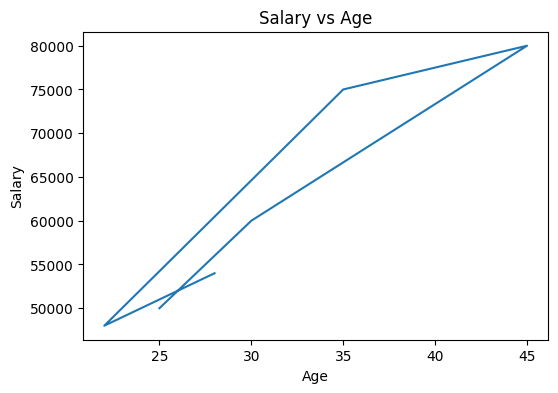

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df['age'], df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary vs Age')
plt.show()

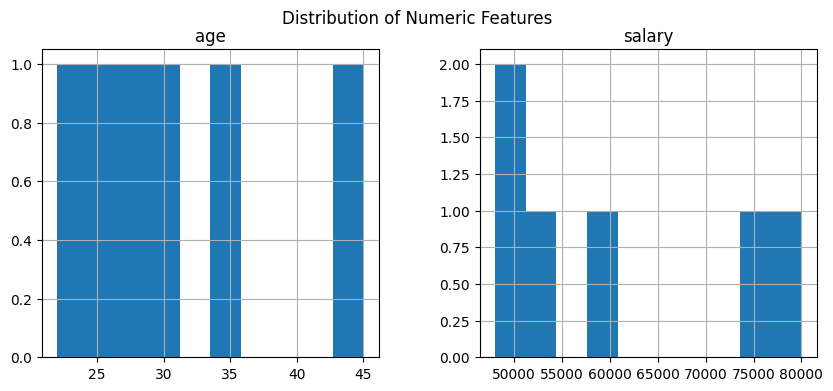

In [3]:

df[numeric_features].hist(bins=10, figsize=(10,4))
plt.suptitle("Distribution of Numeric Features")
plt.show()


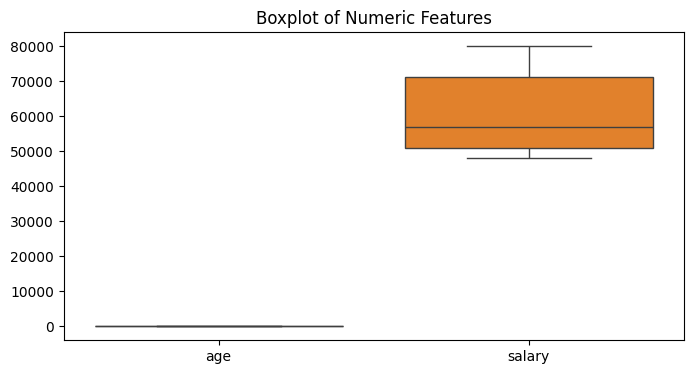

In [4]:

plt.figure(figsize=(8,4))
sns.boxplot(data=df[numeric_features])
plt.title("Boxplot of Numeric Features")
plt.show()


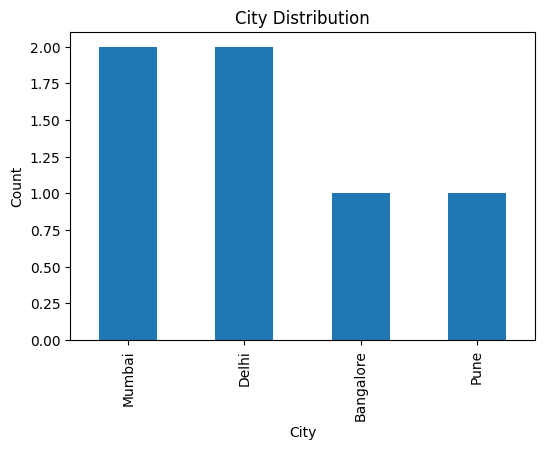

In [5]:

plt.figure(figsize=(6,4))
df['city'].value_counts().plot(kind='bar')
plt.title("City Distribution")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


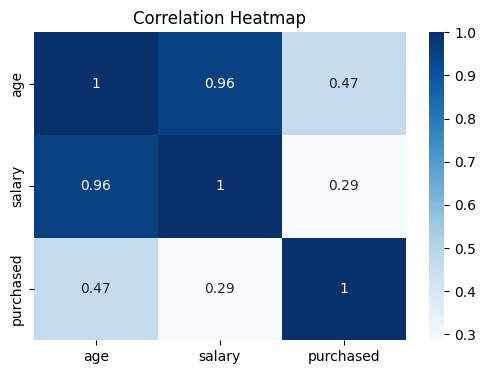

In [6]:

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_features + ['purchased']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


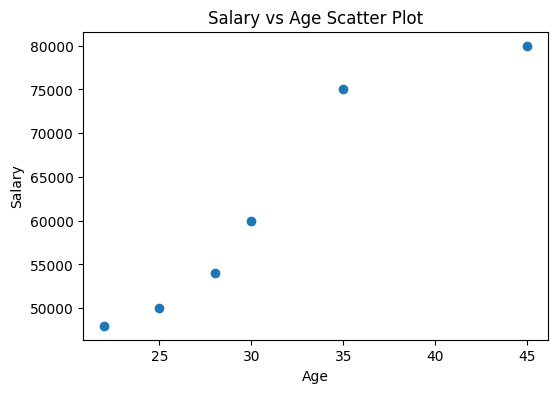

In [7]:

plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary vs Age Scatter Plot")
plt.show()


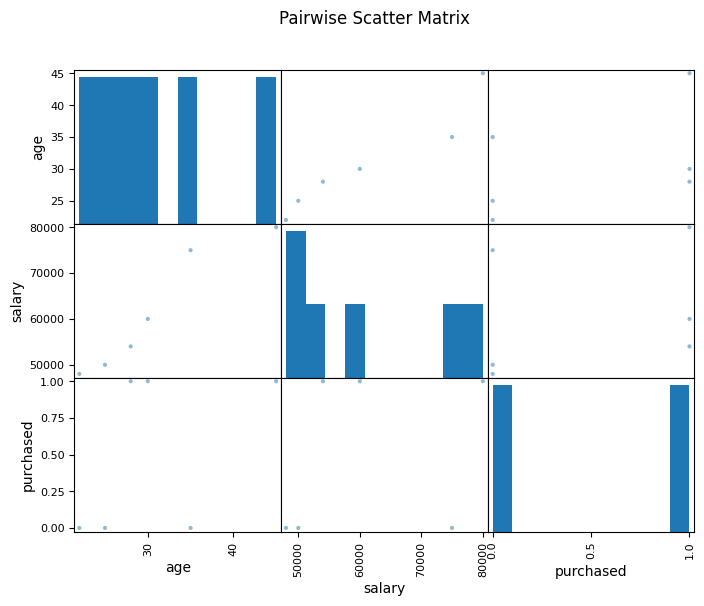

In [8]:

pd.plotting.scatter_matrix(df[numeric_features + ['purchased']], figsize=(8,6))
plt.suptitle("Pairwise Scatter Matrix")
plt.show()
